# IMPORTS

In [170]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 

In [171]:
import matplotlib.pyplot as plt 
# import plotly.express as px

In [172]:
pd.set_option("display.max_columns",100)

# Data Viz, Preprocessing

In [173]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [174]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [175]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [176]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [177]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [178]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].apply(lambda x:x.strip()))

In [179]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [180]:
data_1 = data[~data['TotalCharges'].isna()]

In [181]:
data_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [182]:
data_1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [183]:
not_churn_duration = data_1[data_1['Churn']=="No"]['tenure']
churn_duration = data_1[data_1['Churn']=="Yes"]['tenure']

Text(0, 0.5, 'Customers')

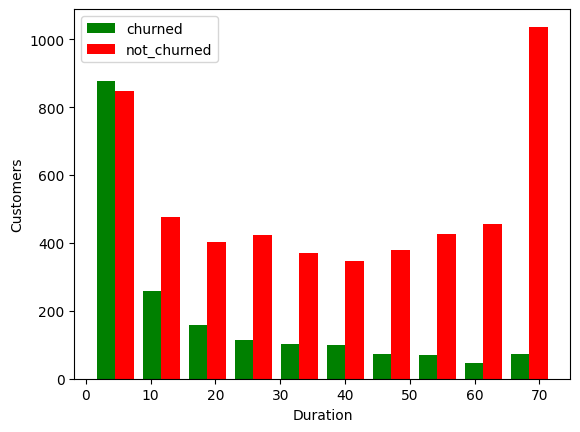

In [184]:
plt.hist([churn_duration,not_churn_duration], label=['churned', 'not_churned'], color=['g','r'])
plt.legend()
plt.xlabel("Duration")
plt.ylabel('Customers')

Text(0, 0.5, 'Customers')

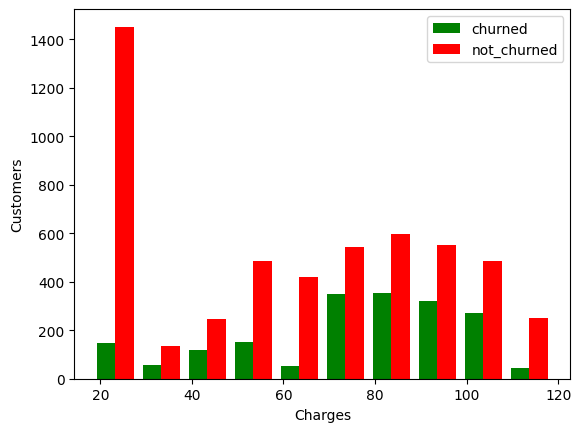

In [185]:
not_churn_duration = data_1[data_1['Churn']=="No"]['MonthlyCharges']
churn_duration = data_1[data_1['Churn']=="Yes"]['MonthlyCharges']

plt.hist([churn_duration,not_churn_duration], label=['churned', 'not_churned'], color=['g','r'])
plt.legend()
plt.xlabel("Charges")
plt.ylabel('Customers')

In [186]:
# Values in each column
def unique_vals(data):
    for col in data:
        print(f"{col}:{data[col].unique()}")

In [187]:
unique_vals(data_1)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [188]:
data_1.replace("No internet service","No",inplace=True)
data_1.replace("No phone service","No",inplace=True)

C:\Users\mvssa\AppData\Local\Temp\ipykernel_17344\2500830867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.replace("No internet service","No",inplace=True)
C:\Users\mvssa\AppData\Local\Temp\ipykernel_17344\2500830867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.replace("No phone service","No",inplace=True)


In [189]:
unique_vals(data_1)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


In [190]:
cols_to_encode = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [191]:
for col in cols_to_encode:
    data_1[col] = data_1[col].replace({'Yes':1,'No':0})

data_1['gender'] = data_1['gender'].replace({'Male':1,"Female":0})

C:\Users\mvssa\AppData\Local\Temp\ipykernel_17344\4143939515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[col] = data_1[col].replace({'Yes':1,'No':0})
C:\Users\mvssa\AppData\Local\Temp\ipykernel_17344\4143939515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['gender'] = data_1['gender'].replace({'Male':1,"Female":0})


In [192]:
unique_vals(data_1)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [193]:
data_1.reset_index(drop=True,inplace=True)

In [194]:
from sklearn.preprocessing import OneHotEncoder

In [195]:
encoder = OneHotEncoder(drop='first')

In [196]:
arra = encoder.fit_transform(data_1[['InternetService','Contract','PaymentMethod']])

In [197]:
one_hot_cols = pd.DataFrame(arra.toarray(),columns = encoder.get_feature_names_out(['InternetService','Contract','PaymentMethod']))

In [198]:
data_encoded = pd.concat([data_1,one_hot_cols],axis=1)

In [199]:
data_encoded.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [200]:
data_encoded.drop(columns=['customerID','InternetService','Contract','PaymentMethod'],inplace=True)

In [201]:
data_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [203]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [204]:
data_encoded[cols_to_scale] = scaler.fit_transform(data_encoded[cols_to_scale])

In [205]:
data_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Train Test Split

In [206]:
data_encoded['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X = data_encoded.drop(columns=['Churn'])
y = data_encoded['Churn']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6021,0,0,0,0,0.591549,0,0,0,0,1,0,1,1,1,0.306468,0.237411,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3404,1,0,0,0,0.028169,1,0,0,0,0,0,1,0,0,0.349751,0.019605,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5474,0,0,1,0,0.760563,1,1,0,0,1,0,0,0,1,0.592040,0.512272,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5515,1,0,1,1,0.619718,1,0,1,0,0,1,0,0,0,0.362189,0.292511,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6328,0,0,1,1,0.760563,1,1,1,0,0,0,1,1,0,0.822388,0.626564,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,0,0,0.028169,1,1,0,0,0,0,0,0,0,0.319900,0.013668,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0,0,0,0,0.704225,1,1,0,1,1,1,1,1,1,0.927861,0.655949,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5226,1,0,0,0,0.112676,1,1,1,0,0,0,0,0,1,0.625871,0.088351,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,0,0,0,0,0.690141,1,0,0,0,0,0,0,0,0,0.014925,0.111961,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [211]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2476,1,1,1,0,0.845070,1,1,0,0,0,0,0,0,0,0.067164,0.171123,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6773,0,0,0,0,0.253521,1,1,0,0,0,0,0,0,0,0.064179,0.051587,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6116,1,0,1,0,0.169014,1,1,0,0,1,0,1,1,1,0.835821,0.154650,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3047,1,0,1,0,0.507042,1,1,1,0,0,0,0,0,1,0.366169,0.232166,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4092,0,0,0,0,0.070423,0,0,1,0,0,0,0,0,0,0.111443,0.016461,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0.007960,0.000029,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5241,1,0,0,0,0.154930,1,1,0,0,0,0,1,1,0,0.759204,0.133251,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5456,0,0,0,0,0.352113,1,0,0,1,1,0,0,0,1,0.376119,0.177060,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5842,0,1,0,0,0.478873,1,1,1,1,1,1,1,1,1,0.920896,0.440515,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Modelling

In [212]:
model = tf.keras.Sequential()

In [213]:
# I/P layer
model.add(tf.keras.layers.Dense(26,activation='relu'))

# 1st hidden layer
model.add(tf.keras.layers.Dense(13,activation='relu'))

# O/P 
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [214]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [215]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [216]:
fir_hist = model.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    verbose=1,
    validation_split=0.2,
    callbacks=early_stop
)

Epoch 1/100
134/141 [===========================>..] - ETA: 0s - loss: 0.5232 - accuracy: 0.7316

141/141 [==============================] - 3s 9ms/step - loss: 0.5197 - accuracy: 0.7331 - val_loss: 0.4595 - val_accuracy: 0.7538
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.7856 - val_loss: 0.4235 - val_accuracy: 0.7938
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.7929 - val_loss: 0.4173 - val_accuracy: 0.7947
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4223 - accuracy: 0.7971 - val_loss: 0.4109 - val_accuracy: 0.8018
Epoch 5/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4176 - accuracy: 0.8000 - val_loss: 0.4124 - val_accuracy: 0.7964
Epoch 6/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4147 - accuracy: 0.8007 - val_loss: 0.4111 - val_accuracy: 0.7991
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8009 - val_loss: 0.4069 - val_accuracy: 0.8027
Epoch 8/100

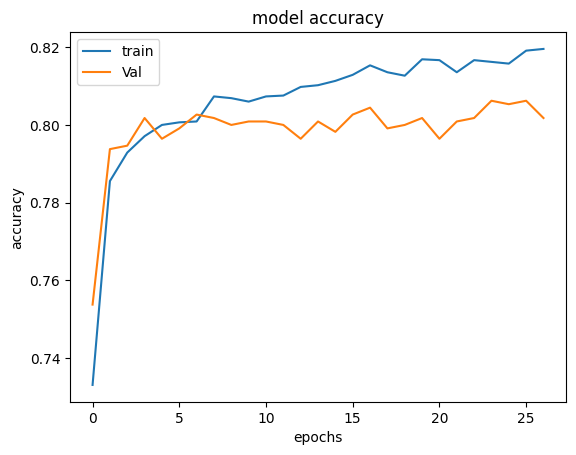

In [217]:
plt.plot(fir_hist.history['accuracy'])
plt.plot(fir_hist.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','Val'],loc='upper left')
plt.show()

In [218]:
test_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [219]:
test_pred = test_pred>0.5

In [220]:
test_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [221]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [222]:
cm = confusion_matrix(y_test,test_pred)

In [223]:
cm

array([[897, 136],
       [161, 213]], dtype=int64)

In [224]:
(914+194)/(914+119+180+194)

0.7874911158493249

# Save preprocessing and models

In [225]:
import pickle

In [226]:
with open('min_max_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [227]:
with open('one_hot_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [228]:
model.save("churn_predictor")

INFO:tensorflow:Assets written to: churn_predictor\assets


INFO:tensorflow:Assets written to: churn_predictor\assets


In [250]:
sample_record = data.iloc[1:2,1:-1]

In [230]:
loaded_model = tf.keras.models.load_model("churn_predictor")
with open('min_max_scaler.pkl', 'rb') as file:
    loaded_min_max_scaler = pickle.load(file)
with open('one_hot_encoder.pkl', 'rb') as file:
    loaded_one_hot_encoder = pickle.load(file)
sample_record.reset_index(drop=True,inplace=True)

# preprocessing
sample_record['TotalCharges'] = pd.to_numeric(sample_record['TotalCharges'])
sample_record['MonthlyCharges'] = pd.to_numeric(sample_record['MonthlyCharges'])
sample_record['tenure'] = pd.to_numeric(sample_record['tenure'])

# Encoding
cols_to_encode_ = ['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']
for col in cols_to_encode_:
    sample_record[col] = sample_record[col].replace({'Yes':1,'No':0})

sample_record['gender'] = sample_record['gender'].replace({'Male':1,"Female":0})
one_hot_cols_to_encode = ['InternetService','Contract','PaymentMethod']
one_hot_arr = loaded_one_hot_encoder.transform(sample_record[one_hot_cols_to_encode])
one_hot_cols_df = pd.DataFrame(one_hot_arr.toarray(),columns = encoder.get_feature_names_out(one_hot_cols_to_encode))
sample_record = pd.concat([sample_record,one_hot_cols_df],axis=1)
sample_record.drop(columns=one_hot_cols_to_encode,inplace=True)

#Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
sample_record[cols_to_scale] = loaded_min_max_scaler.transform(sample_record[cols_to_scale])

#prediction
prediction = loaded_model.predict(sample_record)
prediction = prediction>0.5
prediction[0][0]